In [49]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import pickle
import hvplot.pandas

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
df = pd.read_csv(
    Path('../data/stocks_history.csv'),
    index_col='Unnamed: 0',
    infer_datetime_format=True,
    parse_dates=True
)
df.head()

,MSFT_open,MSFT_high,MSFT_low,MSFT_close,AMD_open,AMD_high,AMD_low,AMD_close,TSLA_open,TSLA_high,...,JNJ_low,JNJ_close,REGN_open,REGN_high,REGN_low,REGN_close,GILD_open,GILD_high,GILD_low,GILD_close
2010-06-29,24.13,24.20,23.110,23.31,7.93,7.93,7.41,7.48,19.00,25.0000,...,58.680,59.24,23.67,23.95,22.86,22.98,35.40,35.61,34.740,34.97
2010-06-30,23.30,23.68,22.950,23.01,7.58,7.65,7.30,7.32,25.79,30.4192,...,58.940,59.06,23.05,23.47,22.32,22.32,34.83,35.13,34.260,34.28
2010-07-01,23.09,23.32,22.730,23.16,7.35,7.53,7.10,7.39,25.00,25.9200,...,58.650,59.07,22.31,22.37,20.45,20.79,34.24,34.27,33.300,34.14
2010-07-02,23.36,23.48,23.050,23.27,7.45,7.48,7.02,7.17,23.00,23.1000,...,58.850,59.08,21.06,21.88,20.75,21.61,34.38,35.16,34.180,34.87
2010-07-06,23.70,24.09,23.584,23.82,7.40,7.42,6.96,7.04,20.00,20.0000,...,58.669,59.08,22.03,22.03,21.16,21.36,35.11,35.42,34.415,34.77


In [52]:
# drop all columns except closing prices
dropped_columns = [
    'MSFT_open',
    'MSFT_high',
    'MSFT_low',
    'TSLA_open',
    'TSLA_high',
    'TSLA_low',
    'JNJ_open',
    'JNJ_high',
    'JNJ_low',
    'REGN_open',
    'REGN_high',
    'REGN_low',
    'GILD_open',
    'GILD_high',
    'GILD_low',
    'AMD_open',
    'AMD_high',
    'AMD_low',
]
df.drop(columns=dropped_columns, inplace=True)
df.head()

,MSFT_close,AMD_close,TSLA_close,JNJ_close,REGN_close,GILD_close
2010-06-29,23.31,7.48,23.89,59.24,22.98,34.97
2010-06-30,23.01,7.32,23.83,59.06,22.32,34.28
2010-07-01,23.16,7.39,21.96,59.07,20.79,34.14
2010-07-02,23.27,7.17,19.20,59.08,21.61,34.87
2010-07-06,23.82,7.04,16.11,59.08,21.36,34.77


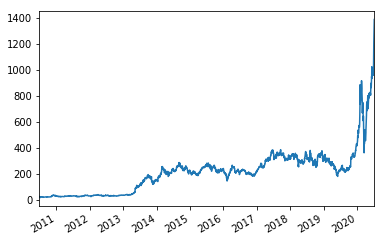

In [53]:
df['TSLA_close'].plot()

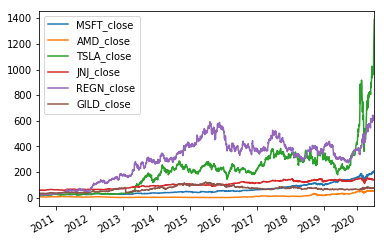

In [54]:
df.plot()

In [55]:
df['MSFT_return'] = df['MSFT_close'].pct_change() 
df['MSFT_lagged_return'] = df['MSFT_return'].shift()
df['AMD_return'] = df['AMD_close'].pct_change() 
df['AMD_lagged_return'] = df['AMD_return'].shift()
df['TSLA_return'] = df['TSLA_close'].pct_change() 
df['TSLA_lagged_return'] = df['TSLA_return'].shift()
df['JNJ_return'] = df['JNJ_close'].pct_change() 
df['JNJ_lagged_return'] = df['JNJ_return'].shift()
df['REGN_return'] = df['REGN_close'].pct_change() 
df['REGN_lagged_return'] = df['REGN_return'].shift()
df['GILD_return'] = df['GILD_close'].pct_change() 
df['GILD_lagged_return'] = df['GILD_return'].shift()

In [56]:
df.tail()

,MSFT_close,AMD_close,TSLA_close,JNJ_close,REGN_close,GILD_close,MSFT_return,MSFT_lagged_return,AMD_return,AMD_lagged_return,TSLA_return,TSLA_lagged_return,JNJ_return,JNJ_lagged_return,REGN_return,REGN_lagged_return,GILD_return,GILD_lagged_return
2020-06-30,203.51,52.61,1079.81,140.63,623.65,76.94,0.025549,0.010747,0.046340,0.003593,0.069807,0.051691,0.011436,0.008925,0.020921,-0.000801,0.031921,-0.000134
2020-07-01,204.70,52.58,1119.63,140.38,609.17,76.06,0.005847,0.025549,-0.000570,0.046340,0.036877,0.069807,-0.001778,0.011436,-0.023218,0.020921,-0.011437,0.031921
2020-07-02,206.26,52.34,1208.66,140.97,622.45,76.35,0.007621,0.005847,-0.004564,-0.000570,0.079517,0.036877,0.004203,-0.001778,0.021800,-0.023218,0.003813,-0.011437
2020-07-06,210.70,53.40,1371.58,142.98,627.25,76.76,0.021526,0.007621,0.020252,-0.004564,0.134794,0.079517,0.014258,0.004203,0.007711,0.021800,0.005370,0.003813
2020-07-07,208.25,52.93,1389.86,142.85,640.88,76.42,-0.011628,0.021526,-0.008801,0.020252,0.013328,0.134794,-0.000909,0.014258,0.021730,0.007711,-0.004429,0.005370


In [57]:
df = df.dropna()
df.tail()

,MSFT_close,AMD_close,TSLA_close,JNJ_close,REGN_close,GILD_close,MSFT_return,MSFT_lagged_return,AMD_return,AMD_lagged_return,TSLA_return,TSLA_lagged_return,JNJ_return,JNJ_lagged_return,REGN_return,REGN_lagged_return,GILD_return,GILD_lagged_return
2020-06-30,203.51,52.61,1079.81,140.63,623.65,76.94,0.025549,0.010747,0.046340,0.003593,0.069807,0.051691,0.011436,0.008925,0.020921,-0.000801,0.031921,-0.000134
2020-07-01,204.70,52.58,1119.63,140.38,609.17,76.06,0.005847,0.025549,-0.000570,0.046340,0.036877,0.069807,-0.001778,0.011436,-0.023218,0.020921,-0.011437,0.031921
2020-07-02,206.26,52.34,1208.66,140.97,622.45,76.35,0.007621,0.005847,-0.004564,-0.000570,0.079517,0.036877,0.004203,-0.001778,0.021800,-0.023218,0.003813,-0.011437
2020-07-06,210.70,53.40,1371.58,142.98,627.25,76.76,0.021526,0.007621,0.020252,-0.004564,0.134794,0.079517,0.014258,0.004203,0.007711,0.021800,0.005370,0.003813
2020-07-07,208.25,52.93,1389.86,142.85,640.88,76.42,-0.011628,0.021526,-0.008801,0.020252,0.013328,0.134794,-0.000909,0.014258,0.021730,0.007711,-0.004429,0.005370


In [58]:
# Slice data in test and training 
train = df.loc['2010':'2017']
test = df.loc['2018':'2020']

In [59]:
# Create dataframes for X_train and X_test
# Create series for y_train and y_test
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train["MSFT_return"].to_frame()
X_test = test["MSFT_lagged_return"].to_frame()
y_train = train["MSFT_return"]
y_test = test["MSFT_return"]

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
#Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# And make a prediction of "y" values for just the test dataset
predictions = model.predict(X_test)

In [63]:
# Construct a dataframe using just the "y" training data:
out_of_sample_results = y_test.to_frame()

# Add a column of "out-of-sample" predictions to that dataframe:  
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd57d839890>,
      dtype=object)

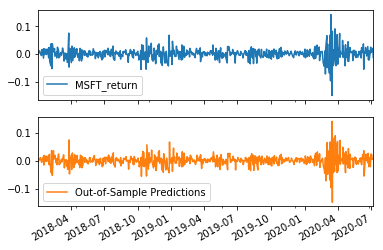

In [64]:
# Plot the out-of-sample results for 2019
out_of_sample_results.plot(subplots=True)

In [ ]:
out_of_sample_results.head(15)

In [18]:
# Calculate out-of-sample mean_squared_error (for comparison to out-of-sample)
out_of_sample_mse = mean_squared_error(
    out_of_sample_results["MSFT_return"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Calculate out-of-sample root mean_squared_error (for comparison to out-of-sample)
out_of_sample_rmse = np.sqrt(out_of_sample_mse)
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 0.03369292495116178


In [19]:
# Create dataframes for X_train and X_test
# Create series for y_train and y_test
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train["MSFT_return"].to_frame()
X_test = test["MSFT_lagged_return"].to_frame()
y_train = train["MSFT_return"]
y_test = test["MSFT_return"]

In [20]:
#Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# And make a prediction of "y" values for just the test dataset
predictions = linear_regression_model.predict(X_test)

In [22]:
# Construct a dataframe using just the "y" training data:
out_of_sample_results = y_test.to_frame()

# Add a column of "out-of-sample" predictions to that dataframe:  
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd57b752590>,
      dtype=object)

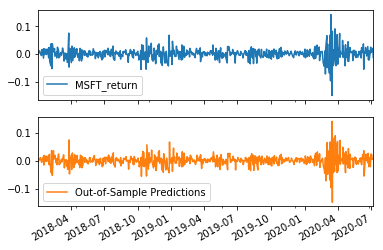

In [23]:
# Plot the out-of-sample results for 2019
out_of_sample_results.plot(subplots=True)

In [24]:
out_of_sample_results.sample(10)

,MSFT_return,Out-of-Sample Predictions
2019-01-04,0.046509,-0.036788
2019-02-22,0.014258,0.021092
2018-02-12,0.010773,0.037290
2019-08-05,-0.034259,-0.008402
2019-01-14,-0.007296,-0.007722
2018-07-13,0.011901,0.021671
2018-11-16,0.009415,0.022006
2018-02-15,0.020372,0.010909
2020-04-23,-0.012102,0.033965
2020-06-02,0.011377,-0.002292


In [25]:
# Calculate out-of-sample mean_squared_error (for comparison to out-of-sample)
out_of_sample_mse = mean_squared_error(
    out_of_sample_results["MSFT_return"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Calculate out-of-sample root mean_squared_error (for comparison to out-of-sample)
out_of_sample_rmse = np.sqrt(out_of_sample_mse)
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 0.03369292495116178


In [ ]:
pkl_filename = "pickle_linear_regression_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(linear_regression_model, file)

# Rolling Out-of-Sample Predictions and Cumulative Returns

In [26]:
# Split the index into weekly periods
weeks = df.index.to_period("w").unique()
print(weeks[0])

2010-06-28/2010-07-04


In [27]:
print(len(weeks))

524


In [28]:
# Declare the training window of 50 weeks
# Define the timeframe of rolling windows
training_window = 50
timeframe = len(weeks) - training_window - 1
print(timeframe)

473


In [29]:
# Construct empty placeholder dataframes.
# (During each iteration of the loop, we'll append that week"s predictions to this DataFrame)
all_predictions = pd.DataFrame(columns=["Out-of-Sample Predictions"])
all_actuals = pd.DataFrame(columns=["Actual Returns"])

In [30]:
# During rolling iteration, split into train and test sets.
# Use linear regression to make out-of-sample predictions.
# Append the results to external dataframes.
for i in range(0, timeframe):
    
    # Beginning of training window
    start_of_training_period = weeks[i].start_time.strftime(format="%Y-%m-%d")
    
    # End of training window
    end_of_training_period = weeks[training_window+i].end_time.strftime(format="%Y-%m-%d")

    # Window of test-window data
    test_week = weeks[training_window + i + 1]
    
    # String of testing window
    start_of_test_week  = test_week.start_time.strftime(format="%Y-%m-%d")
    end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
    
    train = df.loc[start_of_training_period:end_of_training_period]
    test = df.loc[start_of_test_week:end_of_test_week]
    
    # Create new dataframes:
    X_train = train["MSFT_lagged_return"].to_frame()
    y_train = train["MSFT_return"]
    X_test = test["MSFT_lagged_return"].to_frame()
    y_test = test["MSFT_return"]

    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    predictions = regression_model.predict(X_test)
    
    # Create a temporary dataframe to hold predictions
    predictions = pd.DataFrame(predictions, index=X_test.index, columns=["Out-of-Sample Predictions"])
    
    # Create a temporary DataFrame of the actual "y"s in the test dataframe, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Returns"]  
    
    # Append these two dataframes (predictions and actuals) to the two master DataFrames built outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals)   
    

In [31]:
Results = pd.concat([all_actuals, all_predictions], axis=1)
Results.head()

,Actual Returns,Out-of-Sample Predictions
2011-06-20,0.008656,0.000475
2011-06-21,0.011851,0.000434
2011-06-22,-0.004443,0.000489
2011-06-23,-0.000811,0.000207
2011-06-24,-0.013398,0.000270


In [32]:
# 2020 Data
results_2020 = Results.loc['2020':]
results_2020.tail()

,Actual Returns,Out-of-Sample Predictions
2020-06-30,0.025549,-0.002400
2020-07-01,0.005847,-0.009362
2020-07-02,0.007621,-0.000095
2020-07-06,0.021526,-0.000720
2020-07-07,-0.011628,-0.007209


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd57c0ebfd0>,
      dtype=object)

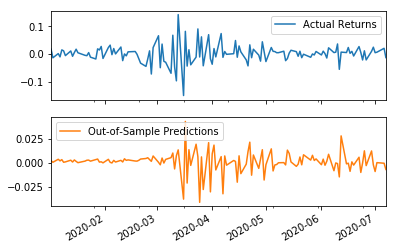

In [33]:
# Plot the results
results_2020.plot(subplots=True)

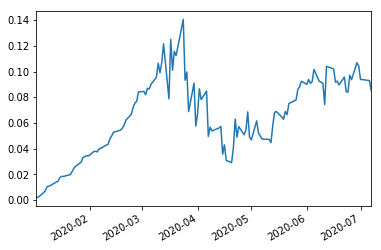

In [34]:
# Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
cumulative_returns = (1 + results_2020['Out-of-Sample Predictions']).cumprod() - 1
cumulative_returns.plot()

In [35]:
cumulative_returns.tail()

2020-06-30    0.104254
2020-07-01    0.093917
2020-07-02    0.093812
2020-07-06    0.093024
2020-07-07    0.085145
Name: Out-of-Sample Predictions, dtype: float64

In [36]:
# Calculate out of Sample Predictions of Closing Prices
results_2020_divided = (results_2020['Out-of-Sample Predictions']/100)
cumulative_returns_divided = (results_2020_divided + 1).cumprod()-1
prices = (cumulative_returns_divided +1) * (df.loc['2020-01-02','MSFT_close'])
prices.hvplot()

:Curve   [index]   (Out-of-Sample Predictions)

In [37]:
# Put Out-of-Sample Predicted Prices in DataFrame
prices = pd.DataFrame(prices)

In [38]:
# Save Predicted Prices into a CSV
prices.to_csv("Linear Regression Results.csv")

In [39]:
# Out-of-sample metrics
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe above)
mse = mean_squared_error(
    results_2020["Actual Returns"],
    results_2020["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rolling_rmse = np.sqrt(mse)
print(f"Rolling Out-of-Sample Root Mean Squared Error (RMSE): {rolling_rmse}")

Rolling Out-of-Sample Root Mean Squared Error (RMSE): 0.03064092248751763


In [40]:
# Create a pickled model for future use 
pkl_filename = "pickle_regression_model_2.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(regression_model, file)

In [44]:
MSFT_df = pd.read_csv(
    Path('../data/stocks_history.csv'),
    index_col='Unnamed: 0',
    infer_datetime_format=True,
    parse_dates=True
)
dropped_columns = [
    'MSFT_open',
    'MSFT_high',
    'MSFT_low',
    'AMD_close',
    'AMD_open',
    'AMD_high',
    'AMD_low',
    'TSLA_close',
    'TSLA_open',
    'TSLA_high',
    'TSLA_low',
    'JNJ_close',
    'JNJ_open',
    'JNJ_high',
    'JNJ_low',
    'REGN_close',
    'REGN_open',
    'REGN_high',
    'REGN_low',
    'GILD_close',
    'GILD_open',
    'GILD_high',
    'GILD_low'
]
MSFT_df.drop(columns=dropped_columns, inplace=True)
MSFT_df.dropna(inplace=True)
MSFT_df.columns = ['Close']
MSFT_df.head()

,Close
2010-06-29,23.31
2010-06-30,23.01
2010-07-01,23.16
2010-07-02,23.27
2010-07-06,23.82


In [45]:
MSFT_returns = MSFT_df.pct_change()
MSFT_returns.tail()

,Close
2020-06-30,0.025549
2020-07-01,0.005847
2020-07-02,0.007621
2020-07-06,0.021526
2020-07-07,-0.011628


In [46]:
# import pickle
# regression_model_path = 'Steffen/pickle_regression_model_2.pkl'
# regression_model = pickle.load(open(regression_model_path, 'rb'))
regression_df = regression_model.predict(MSFT_returns.loc['2020-01-02':,:])
regression_df = pd.DataFrame(regression_df, index=MSFT_returns.loc['2020-01-02':,:].index, columns=['MSFT_regression'])
regression_df.tail()

,MSFT_regression
2020-06-30,-0.009086
2020-07-01,0.000107
2020-07-02,-0.000720
2020-07-06,-0.007209
2020-07-07,0.008261


In [47]:
regression_df = ((regression_df + 1).cumprod() - 1)
regression_df.tail()

,MSFT_regression
2020-06-30,0.203350
2020-07-01,0.203478
2020-07-02,0.202611
2020-07-06,0.193942
2020-07-07,0.203805
